In [31]:
import math
import random
import decimal
import numpy.random as nrand
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import gpflow
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot
import scipy.stats as stats

np.random.seed(0)

In [ ]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [32]:
def ou_values(a,b,dt,sigma,time):
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    x = np.zeros(len(time))
    for i in range(0, len(time)-1):
        x[i+1]=x[i]+a*(b-x[i])*dt+math.sqrt(dt)*sigma*np.random.normal(0,1)
    return x

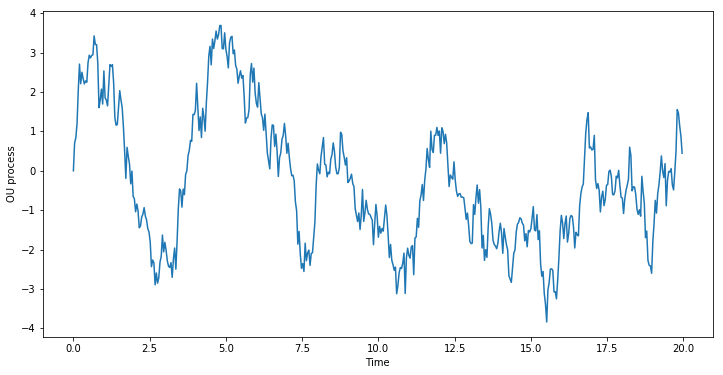

In [33]:
dt=0.04
time=np.arange(0,20,dt)# time
sigma=2
a=1# the coefficient in front, the rate
b=0# the mean
#Simulation of an OU process
x=ou_values(a,b,dt,sigma,time)
t=time# time vector
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU process')
plt.show()

In [34]:
len(time)


500

In [35]:
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [36]:
with gpflow.defer_build():
    k=gpflow.kernels.Matern12(1, lengthscales=10)
    m = gpflow.models.GPR(t_column,x_column, k)
    m.likelihood.variance = 0.1
    m.kern.variance=1

In [37]:
#m.clear()
m.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m.compile()
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,10.0
GPR/kern/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,0.1


In [38]:
with gpflow.defer_build():
    k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=1)
    m1 = gpflow.models.GPR(t_column,x_column, k1)
    m1.likelihood.variance = 1# get this to be bigger


In [39]:
m1.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m1.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m1.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m1.compile()
m1.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,5.0
GPR/kern/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,1.0


In [40]:
with gpflow.defer_build():
    k2=gpflow.kernels.Matern12(1, lengthscales=20,variance=1)
    m2 = gpflow.models.GPR(t_column,x_column, k2)
    m2.likelihood.variance = 2# get this to be bigger

In [41]:
m2.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m2.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m2.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m2.compile()
m2.as_pandas_table()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-bdcc4b82-20/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-10-0edef404c349>", line 4, in <module>
    m1.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflo

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-bdcc4b82-20/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-10-0edef404c349>", line 4, in <module>
    m1.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflo

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-bdcc4b82-20/kern/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-10-0edef404c349>", line 4, in <module>
    m1.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/sit

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-bdcc4b82-20/kern/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-10-0edef404c349>", line 4, in <module>
    m1.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/sit

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-bdcc4b82-20/kern/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-10-0edef404c349>", line 4, in <module>
    m1.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-pa

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-bdcc4b82-20/kern/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-10-0edef404c349>", line 4, in <module>
    m1.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-pa

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-bdcc4b82-20/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-10-0edef404c349>", line 4, in <module>
    m1.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/s

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-bdcc4b82-20/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-10-0edef404c349>", line 4, in <module>
    m1.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/s

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-81d7900b-33/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-12-377f0d83d127>", line 4, in <module>
    m2.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflo

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-81d7900b-33/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-12-377f0d83d127>", line 4, in <module>
    m2.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflo

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-81d7900b-33/kern/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-12-377f0d83d127>", line 4, in <module>
    m2.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/sit

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-81d7900b-33/kern/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-12-377f0d83d127>", line 4, in <module>
    m2.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/sit

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-81d7900b-33/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-12-377f0d83d127>", line 4, in <module>
    m2.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflo

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-81d7900b-33/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-12-377f0d83d127>", line 4, in <module>
    m2.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflo

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-81d7900b-33/kern/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-12-377f0d83d127>", line 4, in <module>
    m2.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-pa

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-81d7900b-33/kern/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-12-377f0d83d127>", line 4, in <module>
    m2.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-pa

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-81d7900b-33/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-12-377f0d83d127>", line 4, in <module>
    m2.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/s

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-81d7900b-33/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-12-377f0d83d127>", line 4, in <module>
    m2.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/s

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-bdcc4b82-20/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-10-0edef404c349>", line 4, in <module>
    m1.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflo

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-bdcc4b82-20/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3287, in run_code
    return outflag  File "<ipython-input-10-0edef404c349>", line 4, in <module>
    m1.compile()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 59, in compile
    self.initialize(session, force=True)  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflow/models/model.py", line 83, in _build
    self._objective = objective  File "/home/pgrad1/2086253P/.local/lib/python3.6/site-packages/gpflo

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,20.0
GPR/kern/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,2.0


In [42]:
# define the log-likelihood function
m.compute_log_likelihood()

-606.5074368048056

In [61]:
def log_likelihood(l,amplitude,noise):# l is lengthscales the rest is obvious
    with gpflow.defer_build():
        k=gpflow.kernels.Matern12(1, lengthscales=l)
        m = gpflow.models.GPR(t_column,x_column, k)
        m.likelihood.variance = noise
        m.kern.variance=amplitude
        m.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
        m.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
        m.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
        m.compile()
    log_lik= m.compute_log_likelihood()
    return log_lik

In [62]:
log_likelihood(1,1,2)
# yupi it works

-730.5861525131537

In [ ]:
#do a MCMC sampler # this would be the first MCMC chain
guess = [5.0,2.0,1]
# Prepare storing MCMC chain as array of arrays.
A = [guess]
# define stepsize of MCMC.
stepsizes = [0.01,0.01,0.01]  # array of stepsizes
accepted  = 0.0
old_theta=guess# define initial values for theta 
old_loglik = log_likelihood(old_theta[0],old_theta[1],old_theta[2])#calculate the first log likelihood # here should be the model
# Metropolis-Hastings with 10,000 iterations.
for p in range(10000):
    # Suggest new candidate from Gaussian proposal distribution.
    new_theta = old_theta + stats.norm(0, stepsizes).rvs() 
    #add the restraints on new_theta
    if new_theta[0]<0 or new_theta[1]<0 or new_theta[2]<0: 
        continue
    new_loglik = log_likelihood(new_theta[0],new_theta[1],new_theta[2])
    # Accept new candidate in Monte-Carlo fashing.
    if (new_loglik > old_loglik):
        A.append(new_theta)
        accepted = accepted + 1.0  # monitor acceptance
        old_loglik=new_loglik
        old_theta=new_theta
    else:
        u = random.uniform(0.0,1.0)
        if (u < math.exp(new_loglik - old_loglik)):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_loglik=new_loglik
            old_theta=new_theta
        else:
            A.append(old_theta)
print("Acceptance rate = "+str(accepted/10000.0))

In [ ]:
np.savetxt("samples_MCMC.txt", A)

In [ ]:
#y = np.loadtxt("samples_MCMC.txt")

In [ ]:
#sampler = gpflow.train.HMC()
#samples = sampler.sample(m, num_samples=10, epsilon=0.00105,logprobs=True,lmin=1, lmax=3, burn=0,thin=1)
#print('acceptance rate: ', len(set(samples.logprobs))/len(samples.logprobs))
#samples = samples.drop('logprobs', axis=1)

In [21]:
# get the samples format to use the other codes

In [26]:
type(samples)

pandas.core.frame.DataFrame

In [27]:
samples

,GPR/kern/lengthscales,GPR/kern/variance,GPR/likelihood/variance
0,10.033827,0.991554,0.100230
1,10.033827,0.991554,0.100230
2,10.030981,0.991596,0.100472
3,10.032414,0.994153,0.100416
4,10.032295,0.994062,0.100775
5,10.036344,0.992423,0.101033
6,10.031636,0.992284,0.101137
7,10.033335,0.992591,0.101055
8,10.031534,0.993399,0.100865
9,10.032384,0.991242,0.100819


Text(0, 0.5, 'parameter value')

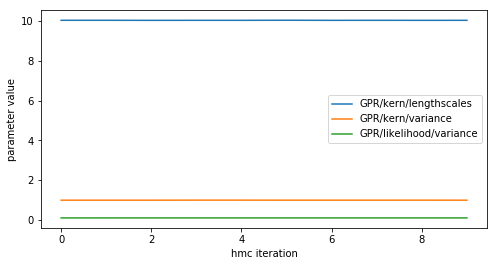

In [23]:
plt.figure(figsize=(8,4))
for i, col in samples.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

Text(0, 0.5, 'signal_variance')

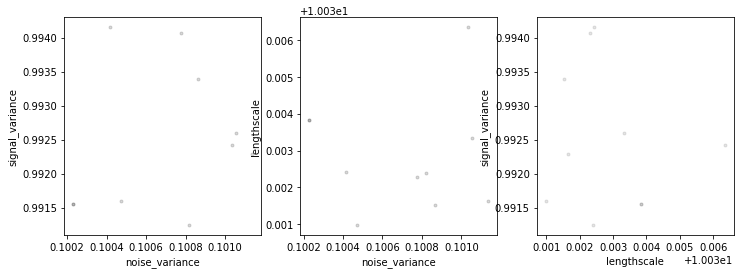

In [24]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples['GPR/kern/lengthscales'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

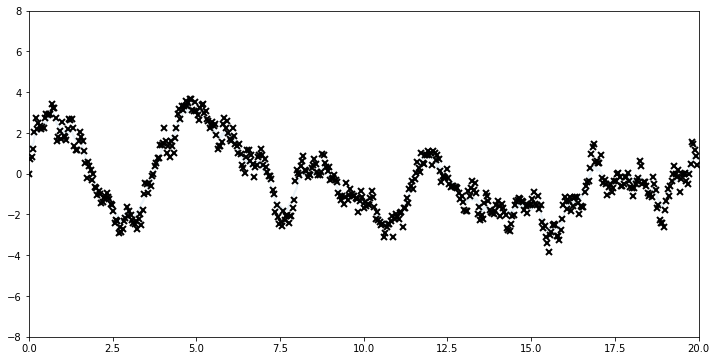

In [25]:
#plot the function posterior
xx = np.linspace(0, 20, 1500)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples.iloc[::20].iterrows():
    f = m.predict_f_samples(xx, 1, initialize=False, feed_dict=m.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-8, 8)